[View in Colaboratory](https://colab.research.google.com/github/ZackAkil/tensorflow-finding-oscillating-function/blob/master/Oscillating_Tensorflow.ipynb)

In [0]:
import tensorflow as tf

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

# Using Tensorflow to find the constants of an oscillating function, given some know points 

start off showing what the different constants within function do. 

## Translation

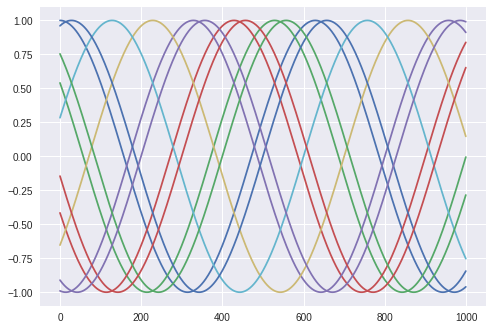

In [13]:
for i in range(10):
  
  plt.plot(np.cos((np.arange(1000)/100) + i))

## Amplitude

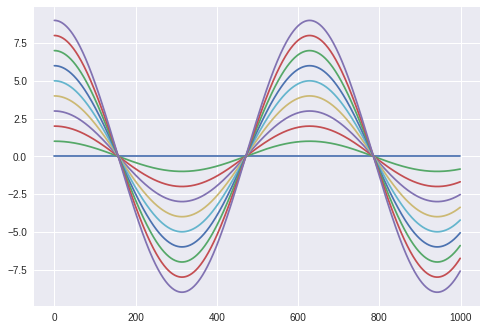

In [15]:
for i in range(10):
  plt.plot(np.cos((np.arange(1000)/100))*i)

## Frequency

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in cos
  


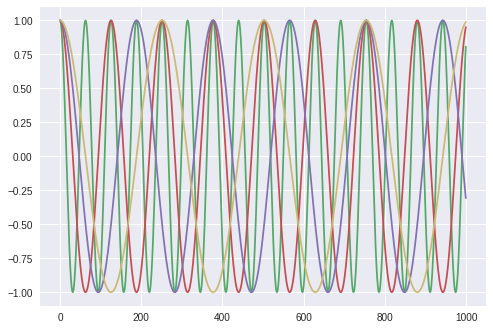

In [23]:
for i in range(5):
  plt.plot(np.cos((np.arange(1000)/(i*10))))

## Define a tensorflow graph that will allow me to find these constants

In [0]:
tf.reset_default_graph()

### Input data placeholders

In [90]:

# velocities are basically dy/dx (this means that we can't just use a very high frequency function that hits every point)
input_velocities = tf.placeholder(tf.float32, [None, 1])

# the f(x)
input_heigts = tf.placeholder(tf.float32, [None, 1])

# the x
input_t = tf.placeholder(tf.float32, [None, 1])

input_velocities, input_heigts, input_t

(<tf.Tensor 'Placeholder:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'Placeholder_1:0' shape=(?, 1) dtype=float32>,
 <tf.Tensor 'Placeholder_2:0' shape=(?, 1) dtype=float32>)

### The optimisable constants that tf will try to find for us

In [0]:
translate_constant = tf.Variable(0.0, name='translate_constant')
amplitude_constant = tf.Variable(1.0, name='amplitude_constant')
frequency_constant = tf.Variable(1.0, name='frequency_constant')

### How tf will use our input data and constants to calculate f(x)

In [92]:
height = tf.cos( (input_t * frequency_constant) + translate_constant ) * amplitude_constant
height

<tf.Tensor 'mul_1:0' shape=(?, 1) dtype=float32>

### How tf will use our input data and constants to calculate the velocities (dy/dx)

*How I find derivatives like a school boy:*
$\frac{f(x + c) - f(x)}{c}$

In [0]:
# this is a terrible way of doing it i assume
dxdy_shift = 0.001
velocity = ((tf.cos( ((input_t + dxdy_shift) * frequency_constant) + translate_constant ) * amplitude_constant) - 
           (tf.cos( (input_t * frequency_constant) + translate_constant ) * amplitude_constant))/dxdy_shift 

### The performance of how well tf has optimised the constants will be just by naively merging its prediction losses of velocities (dy/dx) and the hieghts (f(x))

In [0]:
loss = tf.losses.mean_squared_error(input_velocities, velocity) + tf.losses.mean_squared_error(input_heigts, height)

In [0]:
# create the optimiser object

optimiser = tf.train.AdamOptimizer(learning_rate=0.1)
optimiser_op = optimiser.minimize(loss)

## Create the input data points from a legit oscillating function

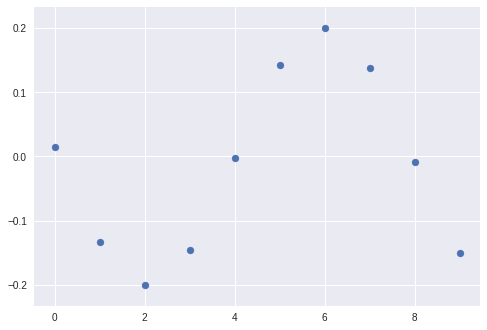

In [122]:
ts = np.arange(10)

fake_heights = np.cos( (ts * 0.8) + 1.5 ) * 0.2

plt.scatter(ts, fake_heights)
plt.show()

In [0]:
dxdy_shift = 0.001
fake_velocity = ((np.cos( (ts * 0.8) + 1.5 + dxdy_shift ) * 0.2) - np.cos( (ts * 0.8) + 1.5 ) * 0.2) / dxdy_shift

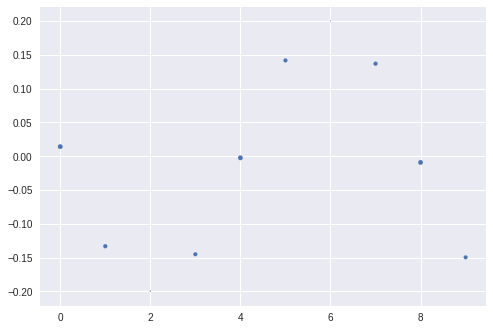

In [100]:
plt.scatter(ts, fake_heights, s = abs(fake_velocity)*100 )
plt.show()

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

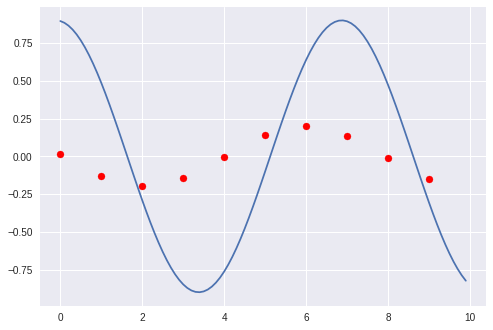

0.7617581
0.58246446
0.4266832
0.2950197
0.19746324
0.12321076
0.06721206
0.030211985
0.011129305
0.0062188525


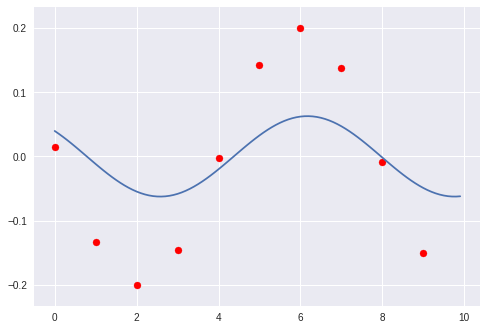

0.011002443
0.02151521
0.03451121
0.047379807
0.05814381
0.06552254
0.06892661
0.068394095
0.06447617
0.058093153


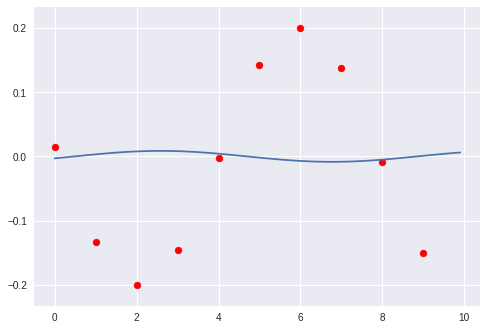

0.05039247
0.042551756
0.03556169
0.02997104
0.025730623
0.022205051
0.018420976
0.013588471
0.007811958
0.0026815892


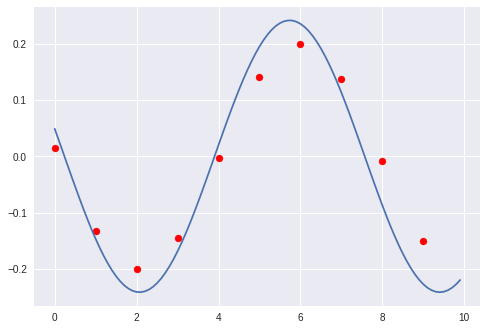

0.0006615266
0.0029015716
0.007526803
0.0109231565
0.010866931
0.008106974
0.0053328834
0.004821141
0.0064859306
0.008125923


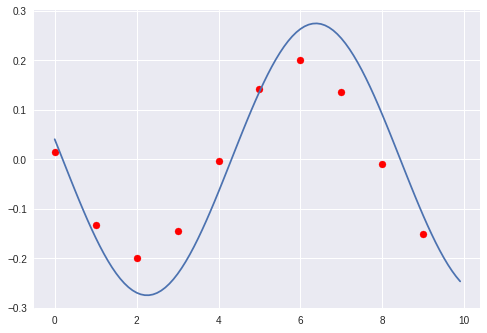

0.00788439
0.0057732332
0.0031976225
0.0016008492
0.0014026354
0.0019798637
0.0024339154
0.0023084073
0.0017418541
0.0011705987


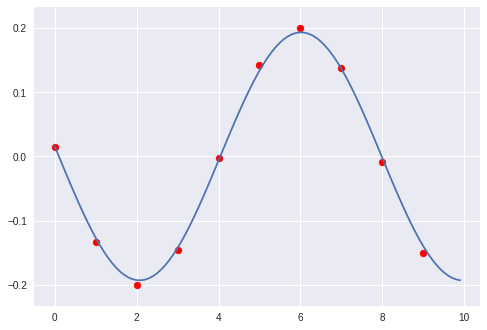

0.00096074236
0.0011931867
0.001676511
0.0021141006
0.002279562
0.0021135828
0.0017280268
0.0013135879
0.0010431344
0.00096726144


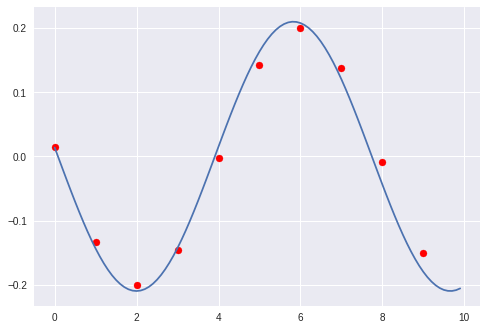

0.0010112427
0.0010319762
0.0009353379
0.00073843333
0.00055807637
0.0005064213
0.00060039805
0.0007522962
0.00084343745
0.0008215276


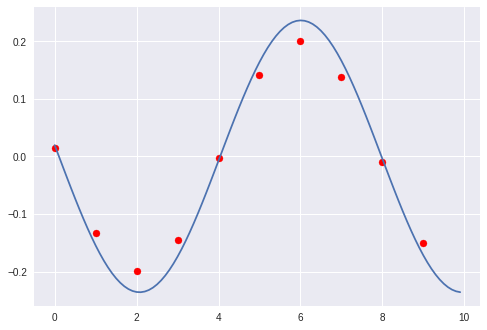

0.0007305186
0.0006556221
0.0006469534
0.00068052835
0.0006950125
0.0006558178
0.00057790434
0.0005102565
0.00048791908
0.00050710374


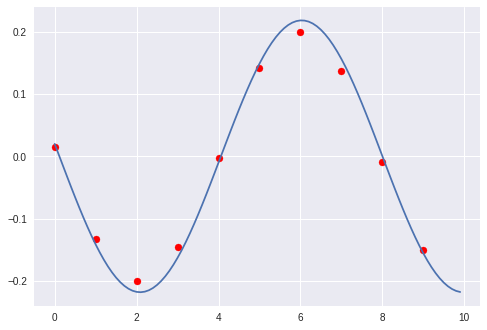

0.000538161
0.00054905063
0.0005365068
0.00051745796
0.0005117869
0.00052246975
0.0005378388
0.000542224
0.00052980613
0.0005089579


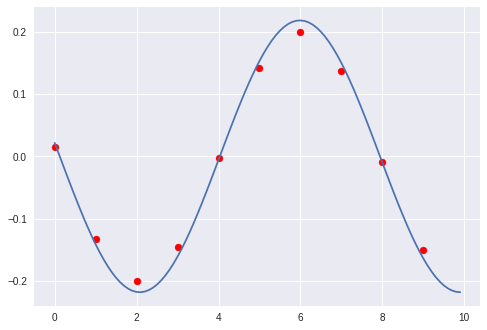

0.0004920203
0.00048751524
0.0004905671
0.00049521704
0.0004912631
0.00048475203
0.00047988773
0.0004812787
0.0004888169
0.0004931862


In [127]:
for i in range(100):

  _, c = sess.run([optimiser_op, loss],feed_dict={input_velocities : fake_velocity.reshape(-1, 1), 
                                                  input_heigts: fake_heights.reshape(-1, 1),
                                                  input_t: ts.reshape(-1, 1)})
  
  
  if (i % 10 == 0):
  
    # extract out the oprimised varibles
    trans, amp, freq = sess.run([translate_constant.read_value(), amplitude_constant.read_value(), frequency_constant.read_value()])

    # plot out the learnt harmonic function   
    x = np.arange(100)/10
    y = np.cos( (x * freq) + trans ) * amp

    # also along with the data its trying to fit   
    plt.scatter(ts, fake_heights, c='r')

    plt.plot(x, y)
    plt.show()
  
  print(c)